In [10]:
import pandas as pd
import seaborn as sns

In [11]:
data=pd.read_csv(r"D:\class\sem3\assignment\COVIDSenti-A.csv")
data

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [12]:
data.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu


In [13]:
data.shape

(30000, 2)

In [14]:
data.columns

Index(['tweet', 'label'], dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-null  object
 1   label   30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


#### Going deeper into tweet and sentiment

In [16]:
data.describe()

,tweet,label
count,30000,30000
unique,29987,3
top,Copper price and coronavirus: ‚ÄúBlack swan li...,neu
freq,3,22949


In [17]:
data.label.value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

#### countplot on different labels

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

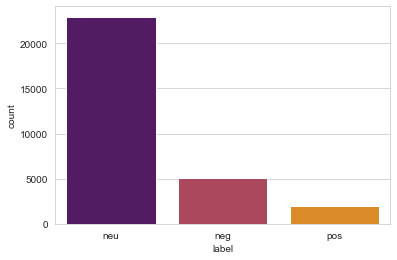

In [18]:
sns.set_style("whitegrid")
sns.countplot(x="label", data=data, palette="inferno")
data["label"].value_counts()

In [19]:
data[data['label']=='neu'].loc[17,'tweet']

'Genome sequence of the new coronavirus associated with a pneumonia cluster in Wuhan, China: https://t.co/6k5urEWn7G'

In [20]:
data[data['label']=='neg'].loc[16,'tweet']

'@KariDebbink @Vineet321 The Frieman Scary Scale makes its debut. Wuhan Coronavirus scores 3 out of 10 N95 masks.'

In [21]:
data[data['label']=='pos'].loc[70,'tweet']

"Novel #Wuhan #coronavirus virus cases leap up.\nLatest blog, which doesn't include 1 case from Shenzhen and 2 cases‚Ä¶ https://t.co/lJks3nQK10"

From the above tweets we can understand that the texts are not plain. We have to clean this text

#### Looking For Null Values

In [22]:
data.isnull().sum()

tweet    0
label    0
dtype: int64

no missing values in the dataset

#### Data Preprocessing

In [23]:
import re 
import numpy as np

In [24]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [25]:
# create new column with removed @user
data['tweet'] = np.vectorize(remove_pattern)(data['tweet'], '@[\w]*')

In [26]:
# to remove HTTP and urls from tweets
data['tweet'] = data['tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [27]:
# remove special characters, numbers, punctuations
data['tweet'] = data['tweet'].str.replace('[^a-zA-Z#]+',' ')

C:\Users\HP\AppData\Local\Temp/ipykernel_7320/1877988735.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tweet'] = data['tweet'].str.replace('[^a-zA-Z#]+',' ')


In [28]:
data['tweet'] = data['tweet'].str.replace('#',' ')

In [29]:
# Making all the words in lower case
data['tweet']=data['tweet'].str.lower() 

In [30]:
data.head()

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,that s true corona virus swine flue bird flu ...,neu
2,tldr not sars possibly new coronavirus difficu...,neg
3,disease outbreak news from the who middle east...,neu
4,china media wsj says sources tell them mystery...,neu


In [31]:
#data.drop('Tweet',axis=1,inplace=True)

In [32]:
data.head()

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,that s true corona virus swine flue bird flu ...,neu
2,tldr not sars possibly new coronavirus difficu...,neg
3,disease outbreak news from the who middle east...,neu
4,china media wsj says sources tell them mystery...,neu


In [33]:
# remove short words
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [34]:
data.head()

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,that true corona virus swine flue bird flu dec...,neu
2,tldr not sars possibly new coronavirus difficu...,neg
3,disease outbreak news from the who middle east...,neu
4,china media wsj says sources tell them mystery...,neu


In [35]:
data[data['label']=='neu'].loc[17,'tweet']

'genome sequence the new coronavirus associated with pneumonia cluster wuhan china'

In [36]:
# create new variable tokenized tweet 
tokenized_tweet = data['tweet'].apply(lambda x: x.split())

In [37]:
#Importing required resources
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [38]:
# import these modules
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
  
# apply lemmatizer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [39]:
# stemming

#from nltk.stem.porter import *
#stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
#tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [40]:
tokenized_tweet

0             [coronavirus, human, coronavirus, type, cdc]
1        [that, true, corona, virus, swine, flue, bird,...
2        [tldr, not, sars, possibly, new, coronavirus, ...
3        [disease, outbreak, news, from, the, who, midd...
4        [china, medium, wsj, say, source, tell, them, ...
                               ...                        
29995    [cdc, test, confirms, westerdam, cruise, ship,...
29996    [two, doctor, die, coronavirus, within, hour, ...
29997    [beijing, the, lockdown, guo, jing, neighbourh...
29998    [coronavirusoutbreak, balochistan, cpec, route...
29999    [the, australian, dollar, ha, hit, fresh, deca...
Name: tweet, Length: 30000, dtype: object

In [41]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [42]:
data['Tweet']  = tokenized_tweet

In [43]:
data.drop('tweet',axis=1,inplace=True)

In [44]:
data.head()

,label,Tweet
0,neu,coronavirus human coronavirus type cdc
1,neu,that true corona virus swine flue bird flu dec...
2,neg,tldr not sars possibly new coronavirus difficu...
3,neu,disease outbreak news from the who middle east...
4,neu,china medium wsj say source tell them mystery ...


In [53]:
X = data['Tweet']
y = data['label']

In [54]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 5000)
tfidf_vect.fit(data['Tweet'])
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [56]:
print(X_train_tfidf)

  (0, 4458)	0.15254756684997578
  (0, 2442)	0.7546121735513383
  (0, 1692)	0.4554074829048486
  (0, 931)	0.09013751255900064
  (0, 83)	0.43791433034353094
  (1, 4911)	0.1980191324455161
  (1, 4547)	0.41326740282605645
  (1, 4544)	0.32297162147904135
  (1, 3404)	0.3530702152613797
  (1, 3139)	0.30359245556876774
  (1, 2852)	0.26165809757608954
  (1, 1766)	0.34338063230624294
  (1, 931)	0.050309964033426836
  (1, 705)	0.11829844515957644
  (1, 700)	0.3072131428437948
  (1, 674)	0.3495945134031423
  (1, 150)	0.2221796130773604
  (2, 4510)	0.27342593022174905
  (2, 4456)	0.20860393106910083
  (2, 3487)	0.4187086827024766
  (2, 2664)	0.35751609101416015
  (2, 2548)	0.5364040806874096
  (2, 1763)	0.17735369676277984
  (2, 1720)	0.2437851874794707
  (2, 1528)	0.4161360343675392
  :	:
  (20996, 2297)	0.26012059175713426
  (20996, 1533)	0.34981430154583104
  (20996, 918)	0.165243657104631
  (20996, 375)	0.3389522141777374
  (20996, 158)	0.15249072342143608
  (20997, 4873)	0.3931445245472843
  (

In [57]:
print(X_test_tfidf)

  (0, 4831)	0.37061332307614175
  (0, 4750)	0.14181812510381755
  (0, 4458)	0.09110166422214645
  (0, 3171)	0.2564222806560311
  (0, 2612)	0.2184148848345195
  (0, 1802)	0.3153434495026351
  (0, 1674)	0.3096471603284962
  (0, 1499)	0.3777753966298944
  (0, 1374)	0.40626115702918625
  (0, 1252)	0.24871537531923515
  (0, 978)	0.2407689787290732
  (0, 918)	0.15095705838320325
  (0, 712)	0.18602249573423496
  (0, 120)	0.20117094349262749
  (1, 4591)	0.2994602415224618
  (1, 4458)	0.09200968959838861
  (1, 4240)	0.4330926897515855
  (1, 3266)	0.22496936125741834
  (1, 3075)	0.2167628783701846
  (1, 2992)	0.23112615306842052
  (1, 2307)	0.3019029655307928
  (1, 2295)	0.23049628319665888
  (1, 1177)	0.4465920561832552
  (1, 931)	0.054366809795667485
  (1, 846)	0.3599773754280977
  :	:
  (8997, 931)	0.05422533859786681
  (8997, 350)	0.43196571279987267
  (8998, 4978)	0.19769671945964268
  (8998, 4205)	0.39889854661926355
  (8998, 4146)	0.35755845449599977
  (8998, 4129)	0.32696381603446467
  (

In [58]:
print(tfidf_vect.vocabulary_)

{'coronavirus': 931, 'human': 2169, 'type': 4636, 'cdc': 636, 'that': 4456, 'true': 4607, 'corona': 918, 'virus': 4750, 'swine': 4381, 'bird': 409, 'flu': 1745, 'december': 1101, 'when': 4847, 'whole': 4859, 'busy': 543, 'not': 3069, 'sars': 3835, 'possibly': 3400, 'new': 3018, 'difficult': 1215, 'confirm': 853, 'because': 356, 'patient': 3266, 'identified': 2199, 'later': 2551, 'infection': 2297, 'disease': 1252, 'outbreak': 3178, 'news': 3026, 'from': 1818, 'the': 4458, 'who': 4857, 'middle': 2838, 'east': 1391, 'respiratory': 3732, 'syndrome': 4390, 'mers': 2819, 'cov': 985, 'united': 4666, 'arab': 218, 'china': 705, 'medium': 2804, 'wsj': 4938, 'say': 3843, 'source': 4151, 'tell': 4427, 'them': 4462, 'mystery': 2965, 'pneumonia': 3370, 'something': 4129, 'ha': 1990, 'been': 362, 'causing': 627, 'same': 3824, 'family': 1636, 'and': 158, 'virologist': 4746, 'weigh': 4826, 'novel': 3075, 'chinese': 712, 'authority': 291, 'have': 2031, 'made': 2705, 'preliminary': 3436, 'why': 4861, 'c

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelBinarizer

In [60]:
svm_model = SVC(probability = True, kernel = 'linear')
svm_model.fit(X_train_tfidf, y_train )

SVC(kernel='linear', probability=True)

In [62]:
svm_predictions = svm_model.predict(X_test_tfidf)
Predicted_data = pd.DataFrame()
Predicted_data['Tweet'] = X_test
Predicted_data['Label'] = svm_predictions
Predicted_data

,Tweet,Label
8225,duterte like welcome all chinese especially co...,neu
10794,cdc detailed information stating the infected ...,neu
9163,coronavirus update pandemic,neu
26591,more than healthcare personnel china infected ...,pos
6631,brent recoups china virus angst fed speak play...,neu
...,...,...
21914,united panic bought striker and are now tellin...,neu
17453,teehee coronavirus pangolin host,neu
20344,nzd usd technical bias bearish dow jones brush...,neu
1878,coronavirus sound like something you catch dri...,neu


In [63]:
Predicted_data['Label'].value_counts()


neu    7267
neg    1341
pos     392
Name: Label, dtype: int64

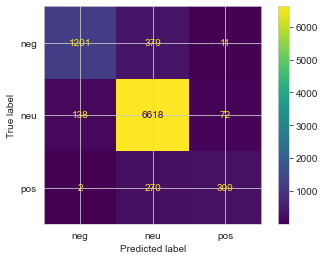

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions)

In [65]:
svm_accuracy = accuracy_score(svm_predictions, y_test)*100
svm_accuracy

90.3111111111111

In [66]:
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

Classification Report:
              precision    recall  f1-score   support

         neg       0.90      0.75      0.82      1591
         neu       0.91      0.97      0.94      6828
         pos       0.79      0.53      0.64       581

    accuracy                           0.90      9000
   macro avg       0.86      0.75      0.80      9000
weighted avg       0.90      0.90      0.90      9000

